# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Ana Sofia Del Rio
*Métodos computacionales 2025-I*

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline
from scipy.integrate import trapezoid, simpson, quad, dblquad

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [44]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente

#Creamos el dataframe
df= pd.DataFrame({'Tiempo(s)':t, 'Corriente(A)':i})
df

,Tiempo(s),Corriente(A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [45]:
#Constantes
L = 0.98  # H
R = 0.142  # Ohm

#Paso de tiempo
h = t[1] - t[0]

#Método de diferencias finitas
def dif_finitas(y, h):
    n = len(y)
    dy = np.zeros_like(y)
    for j in range(n):
        if j == 0:
            dy[j] = (y[j+1] - y[j]) / h  #adelante
        elif j == n - 1:
            dy[j] = (y[j] - y[j-1]) / h  #atras
        else:
            dy[j] = (y[j+1] - y[j-1]) / (2*h)  #cntrado
    return dy

#Método de 3 puntos
def tres_puntos(y, h):
    n = len(y)
    dy = np.zeros_like(y)
    for j in range(n):
        if j == 0:
            dy[j] = (-3*y[j] + 4*y[j+1] - y[j+2]) / (2*h)
        elif j == n-1:
            dy[j] = (3*y[j] - 4*y[j-1] + y[j-2]) / (2*h)
        else:
            dy[j] = (y[j+1] - y[j-1]) / (2*h)
    return dy

#Calculamos las derivadas
d_dif_finitas = dif_finitas(i, h)
d_tresp = tres_puntos(i, h)

#Calculamos el voltaje
V_finitas = L * d_dif_finitas + R * i
V_tresp = L *d_tresp  + R * i

# Mostrar resultados
df['Derivada por diferencias finitas'] = d_dif_finitas
df['Voltaje por diferencias finitas'] = V_finitas
df['Derivada por tres puntos'] =d_tresp
df['Voltaje por tres puntos'] = V_tresp
df

,Tiempo(s),Corriente(A),Derivada por diferencias finitas,Voltaje por diferencias finitas,Derivada por tres puntos,Voltaje por tres puntos
0,1.00,3.10,2.0,2.40020,2.0,2.40020
1,1.01,3.12,2.0,2.40304,2.0,2.40304
2,1.02,3.14,3.0,3.38588,3.0,3.38588
3,1.03,3.18,5.0,5.35156,5.0,5.35156
4,1.04,3.24,6.0,6.34008,7.0,7.32008


In [48]:
#Ahora calculamos el polinomio de interpolación y encontramos la derivada exacta

p_l= lagrange(t, i)
df_exacta = p_l.deriv()

volt_lagrange = L * df_exacta + R * i
print(f'El voltaje usando interpolación de Lagrange es:\n {p_l}')

El voltaje usando interpolación de Lagrange es:
             4             3             2
-8.333e+04 x + 3.417e+05 x - 5.252e+05 x + 3.587e+05 x - 9.186e+04


# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [ ]:
t = np.array([0, 3, 5, 8, 10, 13]) # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m

#Velocidad instantanea para cada uno de los tiempos y distancias mostrados
for i in range(1,5):
  v=(x[i])/t[i]
  print(f'La velocidad en {t[i]} segundos es {v}m/s')

pol = CubicSpline(t, x)
V = pol.derivative()
print(f'La velocidad en 12 segundos es {V(12)} m/s')

La velocidad en 3 segundos es 75.0m/s
La velocidad en 5 segundos es 76.6m/s
La velocidad en 8 segundos es 77.875m/s
La velocidad en 10 segundos es 74.2m/s
La velocidad en 12 segundos es 92.01410499683746 m/s


# 3.
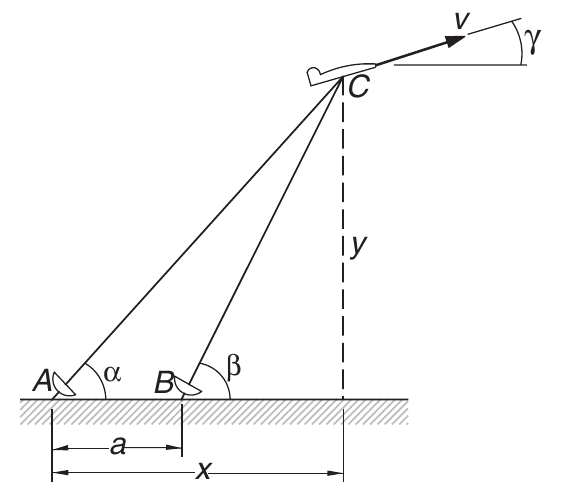


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [53]:
#Datos
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
#Pasamos a rad
df['alpha (rad)'] = np.deg2rad(df['alpha (°)'])
df['beta (rad)'] = np.deg2rad(df['beta (°)'])
#Coordenadas
df['x'] = 500 * (np.tan(df['beta (rad)']) / (np.tan(df['beta (rad)']) - np.tan(df['alpha (rad)'])) )
df['y'] = 500 * (np.tan(df['alpha (rad)']) * np.tan(df['beta (rad)']) / (np.tan(df['beta (rad)']) - np.tan(df['alpha (rad)'])) )
df
#Vectores de tiempo
t = df['t (s)'].to_numpy()
x = df['x'].to_numpy()
y = df['y'].to_numpy()

pl_x = lagrange(t, x)
pl_y = lagrange(t, y)
dx_dt = pl_x.deriv()
dy_dt = pl_y.deriv()

#t=10
vx = dx_dt(10)
vy = dy_dt(10)

#Magnitud de v y ángulo
v = np.sqrt(vx**2 + vy**2)
gamma = np.arctan2(vy, vx)
print(f'La velocidad del avión es {v:.3f} m/s y el ángulo de ascenso es {np.rad2deg(gamma):.3f}°')

La velocidad del avión es 50.099 m/s y el ángulo de ascenso es 15.138°


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [ ]:
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

#Punto a
t_ = t[:8]
v_ = v[:8]
#Calculamos la distancia
d= trapezoid(v_, t_)
print(f'La distancia recorrida desde t=0 hasta t=28 es {d} m')

#Punto b
#Interpolamos para encontrar v(t)
p_L= lagrange(t, v)
a =  p_L.deriv()
a_t= a(28)
print(f'La aceleración en t=28 es {a_t:.3f} m/s^2')


La distancia recorrida desde t=0 hasta t=28 es 2309.0 m
La aceleración en t=28 es 1.734 m/s^2


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [17]:
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)

#Concentración promedio
area=-np.gradient(V,z)
num = simpson(c*area,z)
vt = simpson(area, z)
c_prom = num/vt

print(f'Concentración promedio c = {c_prom:.3f} g/m^3')

Concentración promedio c = 8.097 g/m^3


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



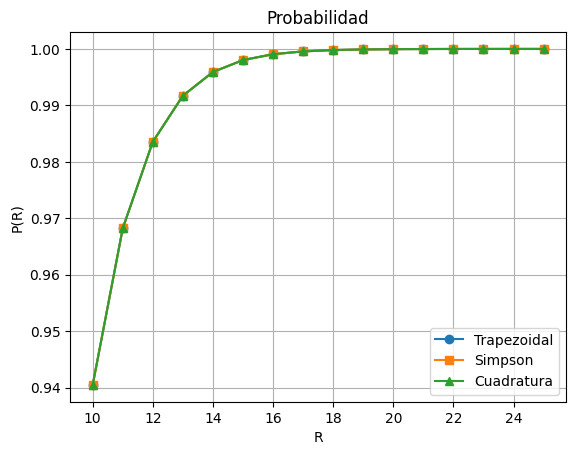

In [29]:
#Punto a
epsilon = 1e-6
factor = 1 / 8
R_values = np.arange(10, 26, 1)
integrando= lambda r: r**2 * (2 - r)**2 * np.exp(-r)
#Trapezoidal
def int_trap_tol(f, a, b, n=50, tol=1e-6):
    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral_anterior = trapezoid(y, x)
    error = np.inf

    while error > tol:
        n *= 2
        x = np.linspace(a, b, n + 1)
        y = f(x)
        integral = trapezoid(y, x)
        error = abs(integral - integral_anterior)
        integral_anterior = integral

    return integral

#Simpson
def int_simpson_tol(f, a, b, tol=1e-6, n=50):
    if n % 2 == 1:
        n += 1  # Simpson necesita número par de intervalos

    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral_anterior = simpson(y, x)
    error = np.inf

    while error > tol:
        n *= 2
        if n % 2 == 1:
            n += 1
        x = np.linspace(a, b, n + 1)
        y = f(x)
        integral = simpson(y, x)
        error = abs(integral - integral_anterior)
        integral_anterior = integral

    return integral

#Cuadratura
def int_quad_tol(f, a, b, tol=1e-6):
    integral, _ = quad(f, a, b, epsabs=tol)
    return integral

#Listas para guardar los valores
P_trap = []
P_simp = []
P_quad = []

for R in R_values:
    P_trap.append(factor * int_trap_tol(integrando, 0, R, tol=epsilon))
    P_simp.append(factor * int_simpson_tol(integrando, 0, R, tol=epsilon))
    P_quad.append(factor * int_quad_tol(integrando, 0, R, tol=epsilon))

#Graficamos
plt.plot(R_values, P_trap, label='Trapezoidal', marker='o')
plt.plot(R_values, P_simp, label='Simpson', marker='s')
plt.plot(R_values, P_quad, label='Cuadratura', marker='^')
plt.xlabel('R')
plt.ylabel('P(R)')
plt.title('Probabilidad')
plt.legend()
plt.grid()




In [33]:
P_total,_= quad(integrando, 0, np.inf, epsabs=1e-10)
print(f'Probabilidad total= {factor * P_total}')

Probabilidad total= 1.0


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

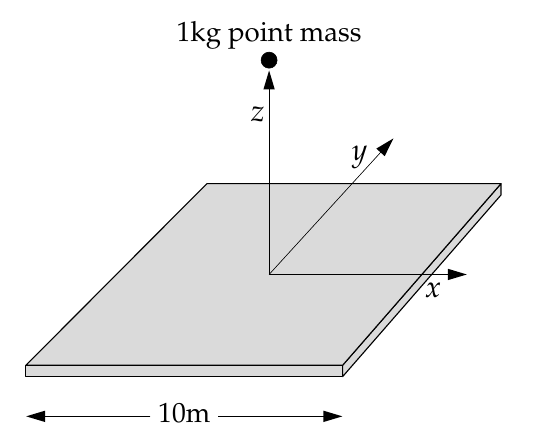

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


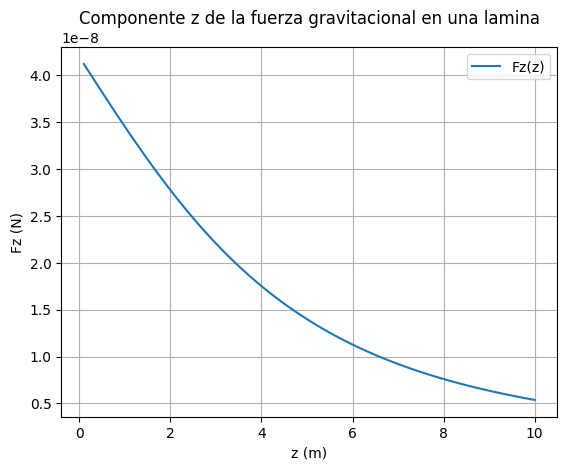

In [38]:
#Datos
G = 6.674e-11
L = 10
M = 10000
sigma= M/(L**2)
x_min, x_max = -L/2, L/2
y_min, y_max = -L/2, L/2

#Definimos el integrando
def integrando(y, x, z):
    return 1.0 / (x**2 + y**2 + z**2)**(1.5)

#Definimos la fuerza
def Fz(z):
    integral, error = dblquad(integrando, -L/2, L/2, lambda x: -L/2, lambda x: L/2, args=(z,))
    Fz = G * sigma * z * integral
    return Fz

#Rango de valores de z
z_vals = np.linspace(0.1, 10, 100)  #Evitamos z=0 para evitar división por cero
Fz_vals = [Fz(z) for z in z_vals]

#Graficamos
plt.plot(z_vals, Fz_vals, label='Fz(z)')
plt.xlabel('z (m)')
plt.ylabel('Fz (N)')
plt.title('Componente z de la fuerza gravitacional en una lamina')
plt.grid()
plt.legend()
plt.show()